# Importing the libraries 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score,recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score


# Load and Explore Data

In [2]:
dataset=pd.read_csv('weatherAUS.csv') 
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [4]:
# find categorical variables
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 7 categorical variables : 
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [5]:
# view the categorical variables
dataset[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [6]:
# check and print categorical variables containing missing values

nullCategorical = [var for var in categorical if dataset[var].isnull().sum()!=0]
print(dataset[nullCategorical].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


Number of labels: cardinality
    
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [7]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(dataset[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


In [8]:
# Feature Extraction

In [9]:
dataset['Date'].dtypes

dtype('O')

In [10]:
# parse the dates, currently coded as strings, into datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [11]:
dataset['Date'].dtypes

dtype('<M8[ns]')

In [12]:
# extract year from date
dataset['Year'] = dataset['Date'].dt.year
# extract month from date
dataset['Month'] = dataset['Date'].dt.month
# extract day from date
dataset['Day'] = dataset['Date'].dt.day

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [14]:
# drop the original Date variable
dataset.drop('Date', axis=1, inplace = True)
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


## Explore Categorical Variables

In [15]:
# Explore Location variable
dataset.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [16]:
# check frequency distribution of values in Location variable
dataset.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [17]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
pd.get_dummies(dataset.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Explore WindGustDir variable
dataset.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [19]:
# check frequency distribution of values in WindGustDir variable
dataset.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [20]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
pd.get_dummies(dataset.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
# sum the number of 1s per boolean variable over the rows of the dataset --> it will tell us how many observations we have for each category
pd.get_dummies(dataset.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
dtype: int64

In [22]:
# Explore WindDir9am variable
dataset.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [23]:
dataset.WindDir9am.value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [24]:
pd.get_dummies(dataset.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# sum the number of 1s per boolean variable over the rows of the dataset -- it will tell us how many observations we have for each category

pd.get_dummies(dataset.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
dtype: int64

In [26]:
# Explore WindDir3pm variable
dataset['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [27]:
dataset['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [28]:
pd.get_dummies(dataset.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [29]:
pd.get_dummies(dataset.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7724
ESE     8382
N       8667
NE      8164
NNE     6444
NNW     7733
NW      8468
S       9598
SE     10663
SSE     9142
SSW     8010
SW      9182
W       9911
WNW     8656
WSW     9329
NaN     3778
dtype: int64

In [30]:
# Explore RainToday variable
dataset['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [31]:
dataset.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [32]:
pd.get_dummies(dataset.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [33]:
pd.get_dummies(dataset.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31455
NaN     1406
dtype: int64

## Explore Numerical Variables

In [34]:
# find numerical variables
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical variables : \n'.format(len(numerical)), numerical)

There are 20 numerical variables : 
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Year', 'Month', 'Day']


In [35]:
# view the numerical variables
dataset[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,2008,12,5


In [36]:
# check missing values in numerical variables
dataset[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
Year                 0
Month                0
Day                  0
dtype: int64

In [37]:
# view summary statistics in numerical variables to check for outliers
print(round(dataset[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

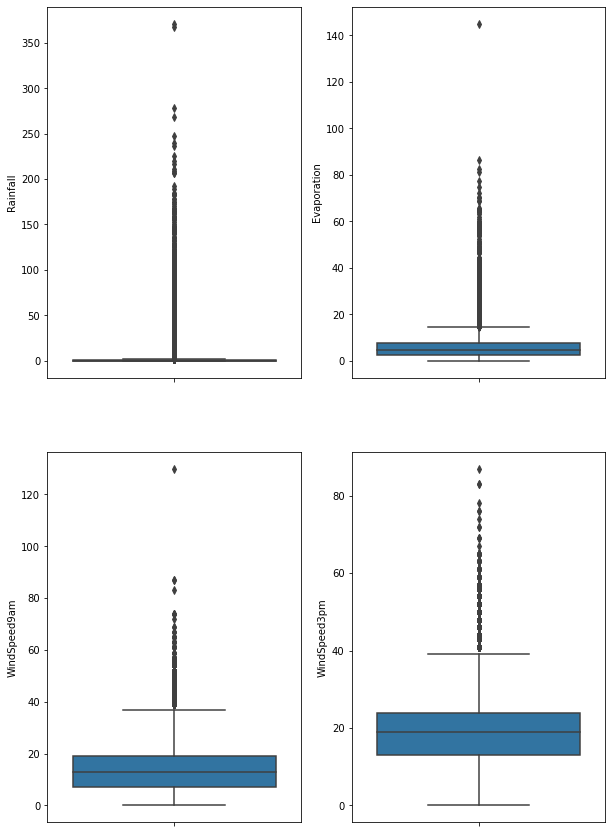

In [38]:
# plot box plot to check outliers
plt.figure(figsize=(10,15))

plt.subplot(2, 2, 1)
fig = sns.boxplot(y=dataset['Rainfall'])
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = sns.boxplot(y=dataset["Evaporation"])
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = sns.boxplot(y=dataset['WindSpeed9am'])
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = sns.boxplot(y=dataset['WindSpeed3pm'])
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

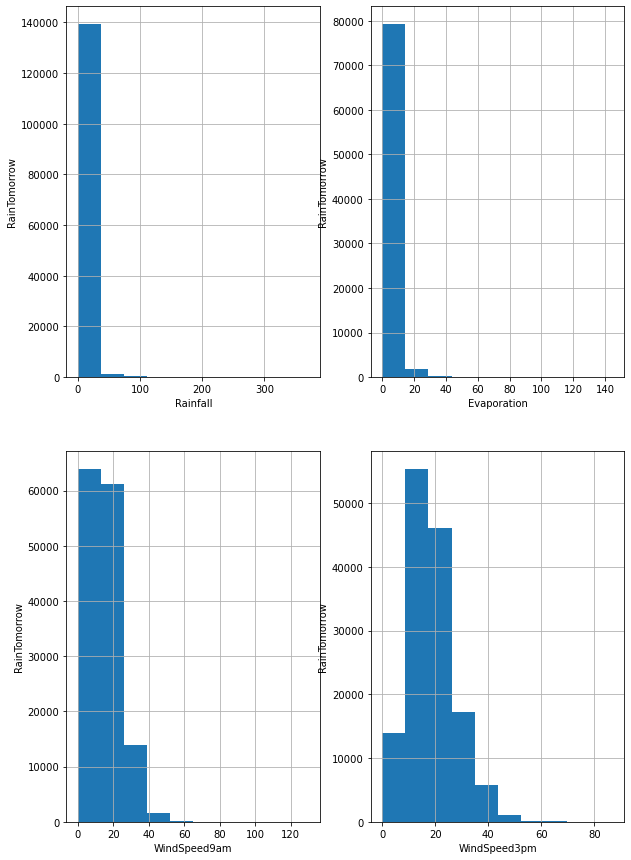

In [39]:
# plot histogram to check distribution
plt.figure(figsize=(10,15))

plt.subplot(2, 2, 1)
fig = dataset.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = dataset.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = dataset.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = dataset.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [40]:
# find outliers for Rainfall variable

IQR = dataset.Rainfall.quantile(0.75) - dataset.Rainfall.quantile(0.25)
Rainfall_Lower_fence = dataset.Rainfall.quantile(0.25) - (IQR * 3)
Rainfall_Upper_fence = dataset.Rainfall.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Rainfall_Lower_fence, upperboundary=Rainfall_Upper_fence))

Outliers are values < -2.4000000000000004 or > 3.2


In [41]:
print('Number of outliers are {}'. format(dataset[(dataset.Rainfall> Rainfall_Upper_fence) | (dataset.Rainfall< Rainfall_Lower_fence)]['Rainfall'].count()))

Number of outliers are 20462


In [42]:
# find outliers for Evaporation variable

IQR = dataset.Evaporation.quantile(0.75) - dataset.Evaporation.quantile(0.25)
Evaporation_Lower_fence = dataset.Evaporation.quantile(0.25) - (IQR * 3)
Evaporation_Upper_fence = dataset.Evaporation.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Evaporation_Lower_fence, upperboundary=Evaporation_Upper_fence))

Outliers are values < -11.800000000000002 or > 21.800000000000004


In [43]:
print('Number of outliers are {}'. format(dataset[(dataset.Evaporation> Evaporation_Upper_fence) | (dataset.Evaporation< Evaporation_Lower_fence)]['Evaporation'].count()))

Number of outliers are 471


In [44]:
# find outliers for WindSpeed9am variable

IQR = dataset.WindSpeed9am.quantile(0.75) - dataset.WindSpeed9am.quantile(0.25)
WindSpeed9am_Lower_fence = dataset.WindSpeed9am.quantile(0.25) - (IQR * 3)
WindSpeed9am_Upper_fence = dataset.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=WindSpeed9am_Lower_fence, upperboundary=WindSpeed9am_Upper_fence))

Outliers are values < -29.0 or > 55.0


In [45]:
print('Number of outliers are {}'. format(dataset[(dataset.WindSpeed9am> WindSpeed9am_Upper_fence) | (dataset.WindSpeed9am< WindSpeed9am_Lower_fence)]['WindSpeed9am'].count()))

Number of outliers are 107


In [46]:
# find outliers for WindSpeed3pm variable

IQR = dataset.WindSpeed3pm.quantile(0.75) - dataset.WindSpeed3pm.quantile(0.25)
WindSpeed3pm_Lower_fence = dataset.WindSpeed3pm.quantile(0.25) - (IQR * 3)
WindSpeed3pm_Upper_fence = dataset.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=WindSpeed3pm_Lower_fence, upperboundary=WindSpeed3pm_Upper_fence))

Outliers are values < -20.0 or > 57.0


In [47]:
print('Number of outliers are {}'. format(dataset[(dataset.WindSpeed3pm> WindSpeed3pm_Lower_fence) | (dataset.WindSpeed3pm< WindSpeed3pm_Upper_fence)]['WindSpeed3pm'].count()))

Number of outliers are 139563


In [48]:
def max_value(dataset, variable, top):
    return np.where(dataset[variable]>top, top, dataset[variable])


dataset['Rainfall'] = max_value(dataset, 'Rainfall', Rainfall_Upper_fence)
dataset['Evaporation'] = max_value(dataset, 'Evaporation', Evaporation_Upper_fence)
dataset['WindSpeed9am'] = max_value(dataset, 'WindSpeed9am', WindSpeed9am_Upper_fence)
dataset['WindSpeed3pm'] = max_value(dataset, 'WindSpeed3pm', 57)

In [49]:
print('Number of outliers are {}'. format(dataset[(dataset.Rainfall> Rainfall_Upper_fence) | (dataset.Rainfall< Rainfall_Lower_fence)]['Rainfall'].count()))

Number of outliers are 0


In [50]:
print('Number of outliers are {}'. format(dataset[(dataset.Evaporation> Evaporation_Upper_fence) | (dataset.Evaporation< Evaporation_Lower_fence)]['Evaporation'].count()))

Number of outliers are 0


In [51]:
print('Number of outliers are {}'. format(dataset[(dataset.WindSpeed9am> WindSpeed9am_Upper_fence) | (dataset.WindSpeed9am< WindSpeed9am_Lower_fence)]['WindSpeed9am'].count()))

Number of outliers are 0


In [52]:
print('Number of outliers are {}'. format(dataset[(dataset.WindSpeed3pm> WindSpeed3pm_Lower_fence) | (dataset.WindSpeed3pm< WindSpeed3pm_Upper_fence)]['WindSpeed3pm'].count()))

Number of outliers are 139563


In [53]:
# Replace NaN with default values

In [54]:
nullValues = [var for var in dataset.columns if dataset[var].isnull().sum()!=0]
print(dataset[nullValues].isnull().sum())

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64


In [55]:
categorical = [var for var in nullValues if dataset[var].dtype=='O']

In [56]:
from sklearn.impute import SimpleImputer 
categoricalImputer = SimpleImputer(missing_values=np.nan,strategy='constant') 
categoricalImputer.fit(dataset[categorical]) 
dataset[categorical]=categoricalImputer.transform(dataset[categorical])
print(dataset.head())

  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  Cloud3pm  Temp9am  \
0           44.0          W        WNW  ...       8.0       NaN     16.9   
1           44.0        NNW        WSW  ...       NaN       NaN     17.2   
2           46.0          W        WSW  ...       NaN       2.0     21.0   
3           24.0         SE          E  ...       NaN       NaN     18.1   
4           41.0        ENE         NW  ...       7.0       8.0     17.8   

   Temp3pm  RainToday  RISK_MM  RainTomorrow  Year  Month  Day  
0     21.8     

In [57]:
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

In [58]:
from sklearn.impute import SimpleImputer 
numericalImputer = SimpleImputer(missing_values=np.nan,strategy='mean') 
numericalImputer.fit(dataset[numerical]) 
dataset[numerical]=numericalImputer.transform(dataset[numerical])
print(dataset.head())

  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.404478  7.624853           W   
1   Albury      7.4     25.1       0.0     5.404478  7.624853         WNW   
2   Albury     12.9     25.7       0.0     5.404478  7.624853         WSW   
3   Albury      9.2     28.0       0.0     5.404478  7.624853          NE   
4   Albury     17.5     32.3       1.0     5.404478  7.624853           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  Cloud3pm  Temp9am  \
0           44.0          W        WNW  ...  8.000000  4.503167     16.9   
1           44.0        NNW        WSW  ...  4.437189  4.503167     17.2   
2           46.0          W        WSW  ...  4.437189  2.000000     21.0   
3           24.0         SE          E  ...  4.437189  4.503167     18.1   
4           41.0        ENE         NW  ...  7.000000  8.000000     17.8   

   Temp3pm  RainToday  RISK_MM  RainTomorrow    Year  Month  Day  
0     21.8   

# Split data for model

In [59]:
x = dataset.drop(['RainTomorrow'], axis=1)  # get all row data expect RainTomorrow
y = dataset['RainTomorrow']  # get the RainTomorrow column depentant variable data for all rows

In [60]:
print(x.head())

  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.404478  7.624853           W   
1   Albury      7.4     25.1       0.0     5.404478  7.624853         WNW   
2   Albury     12.9     25.7       0.0     5.404478  7.624853         WSW   
3   Albury      9.2     28.0       0.0     5.404478  7.624853          NE   
4   Albury     17.5     32.3       1.0     5.404478  7.624853           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000  4.503167   
1           44.0        NNW        WSW  ...       1007.8  4.437189  4.503167   
2           46.0          W        WSW  ...       1008.7  4.437189  2.000000   
3           24.0         SE          E  ...       1012.8  4.437189  4.503167   
4           41.0        ENE         NW  ...       1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RISK_MM    Year  Month  

In [61]:
print(y[:10])

0     No
1     No
2     No
3     No
4     No
5     No
6     No
7     No
8    Yes
9     No
Name: RainTomorrow, dtype: object


# Encoding categorical data

In [62]:
#encoding independent variable 

In [63]:
x = pd.get_dummies(x)
print(x.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6     5.404478  7.624853           44.0   
1      7.4     25.1       0.0     5.404478  7.624853           44.0   
2     12.9     25.7       0.0     5.404478  7.624853           46.0   
3      9.2     28.0       0.0     5.404478  7.624853           24.0   
4     17.5     32.3       1.0     5.404478  7.624853           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SSE  \
0          20.0          24.0         71.0         22.0  ...               0   
1           4.0          22.0         44.0         25.0  ...               0   
2          19.0          26.0         38.0         30.0  ...               0   
3          11.0           9.0         45.0         16.0  ...               0   
4           7.0          20.0         82.0         33.0  ...               0   

   WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0               0         

In [64]:
## Encoding dependent variable 

In [65]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1 
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
print(y[:10])

[0 0 0 0 0 0 0 0 1 0]


# Splitting the dataset into training and test set  

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state 


In [67]:
print(x_train.head())

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
95444     13.0     21.0       3.2     5.404478  6.000000      31.000000   
27932     19.5     22.8       3.2     5.404478  7.624853      35.000000   
15097     21.0     33.4       0.0     5.404478  7.624853      39.984292   
94607     10.3     19.8       3.2     2.800000  5.500000      54.000000   
99888     15.5     25.3       0.2     5.404478  7.624853      31.000000   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
95444           6.0          17.0         89.0         70.0  ...   
27932          13.0           0.0         99.0         83.0  ...   
15097           4.0          19.0         26.0         17.0  ...   
94607           9.0          20.0         78.0         50.0  ...   
99888           4.0          20.0         80.0         77.0  ...   

       WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
95444               0               0              1             0   


In [68]:
print(x_test.head())

        MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
86232      17.4     29.0       0.0     3.600000  11.100000           33.0   
57576       6.8     14.4       0.8     0.800000   7.624853           46.0   
124071     10.1     15.4       3.2     5.404478   7.624853           31.0   
117955     14.4     33.4       0.0     8.000000  11.600000           41.0   
133468      6.8     14.3       3.2     0.200000   7.300000           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
86232           11.0          19.0         63.0         61.0  ...   
57576           17.0          22.0         80.0         55.0  ...   
124071          13.0           9.0         70.0         61.0  ...   
117955           9.0          17.0         40.0         23.0  ...   
133468          15.0          13.0         92.0         47.0  ...   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
86232                0               0             

In [69]:
print(y_train[:10])

[1 1 0 1 0 0 0 0 0 0]


In [70]:
print(y_test[:10])

[0 0 0 0 0 0 1 1 0 0]


# Feature scaling 

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)
print(x_train[:10,:])

[[0.50356295 0.48771267 1.         ... 0.         1.         0.        ]
 [0.65795724 0.52173913 1.         ... 0.         1.         0.        ]
 [0.6935867  0.7221172  0.         ... 1.         0.         0.        ]
 ...
 [0.74109264 0.80718336 0.         ... 1.         0.         0.        ]
 [0.66508314 0.68241966 0.         ... 1.         0.         0.        ]
 [0.59857482 0.66162571 0.         ... 1.         0.         0.        ]]


In [72]:
print(x_test[:10,:])

[[0.60807601 0.6389414  0.         ... 1.         0.         0.        ]
 [0.35629454 0.36294896 0.25       ... 1.         0.         0.        ]
 [0.43467933 0.38185255 1.         ... 0.         1.         0.        ]
 ...
 [0.52256532 0.47069943 0.         ... 1.         0.         0.        ]
 [0.67458432 0.59546314 0.125      ... 1.         0.         0.        ]
 [0.39667458 0.47258979 0.         ... 1.         0.         0.        ]]


# Build Model 

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(x_train,y_train) 

LogisticRegression(random_state=0, solver='liblinear')

In [74]:
#predicting the test set results
y_pred = classifier.predict(x_test)

# Evaluate Model 

In [75]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[32426   610]
 [ 3445  6177]]


In [76]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     33036
           1       0.91      0.64      0.75      9622

    accuracy                           0.90     42658
   macro avg       0.91      0.81      0.85     42658
weighted avg       0.91      0.90      0.90     42658



In [77]:
accuracy_score(y_test,y_pred)

0.9049416287683436

In [78]:
average_precision= average_precision_score(y_test,y_pred)
print(average_precision)

0.6650264570537755


In [79]:
recall_score(y_test,y_pred)

0.6419663271669092

In [80]:
precision_score(y_test,y_pred)

0.9101222926182407

In [81]:
f1_score(y_test,y_pred)

0.7528795173380463

In [82]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

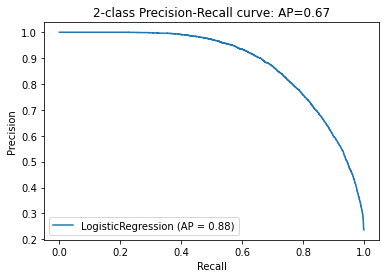

In [83]:
disp = plot_precision_recall_curve(classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))